In [39]:
import numpy as np
import scipy as sc
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import odr
from scipy import stats 
plt.style.use('default')

In [40]:
data = ascii.read("Lab4.csv") #import data 
data

Time (s),Channel 1 (V),Channel 2 (V)
float64,float64,float64
-0.00053235,-0.0002860352496972703,-0.0007243024430577802
-0.00053222,5.23893454732518e-05,-5.526111886421076e-05
-0.00053209,-0.0002860352496972703,-5.526111886421076e-05
-0.00053196,5.23893454732518e-05,-0.0003897817809609955
-0.0005318300000000001,5.23893454732518e-05,-0.000724302443057628
-0.0005317000000000001,5.23893454732518e-05,-0.0007243024430577802
-0.00053157,0.00039081394064362,-5.526111886421076e-05
-0.00053144,5.23893454737135e-05,-5.526111886436288e-05
-0.00053131,0.001067663130984818,-0.0003897817809609955


In [41]:
Time = data.columns[0] #Define time 
Channel_1 = data.columns[1] #Define input 
Channel_2 = data.columns[2] #Define output 

Text(0.5, 1.0, 'Time vs Amplitude')

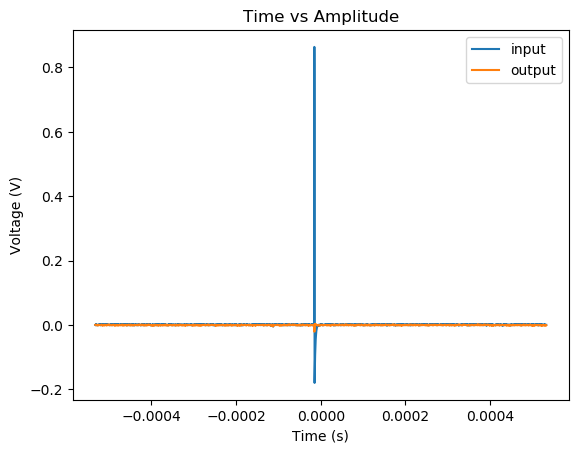

In [42]:
# plot the data 
fig = plt.figure()
plt.plot(Time[2:],Channel_1[2:], label= 'input') 
plt.plot(Time[2:],Channel_2[2:], label= 'output')
plt.legend()
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.title("Time vs Amplitude")

After plot the data, we got same graph that we saw in waveform which means our data plotted correct. 

Text(0.5, 1.0, 'Frequency Domain')

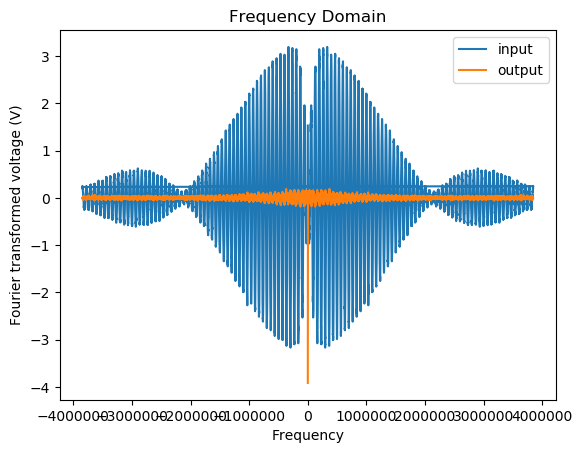

In [43]:
xdata = np.fft.fftfreq(8192, ((np.max(Time)-np.min(Time))/(8192-1)))
Output_real = np.real(np.fft.fft(np.fft.fftshift(Channel_2))) 
Input_real = np.real(np.fft.fft(np.fft.fftshift(Channel_1)))

Output_imag = np.imag(np.fft.fft(np.fft.fftshift(Channel_2)))
Input_imag = np.imag(np.fft.fft(np.fft.fftshift(Channel_1)))

#plot the real part of fourier transformed data 

plt.figure()
plt.plot(xdata,Input_real, label = 'input')
plt.plot(xdata,Output_real, label = 'output' )
plt.legend()
plt.ylabel('Fourier transformed voltage (V)')
plt.xlabel('Frequency')
plt.title("Frequency Domain")

Text(0.5, 1.0, 'Frequency Domain')

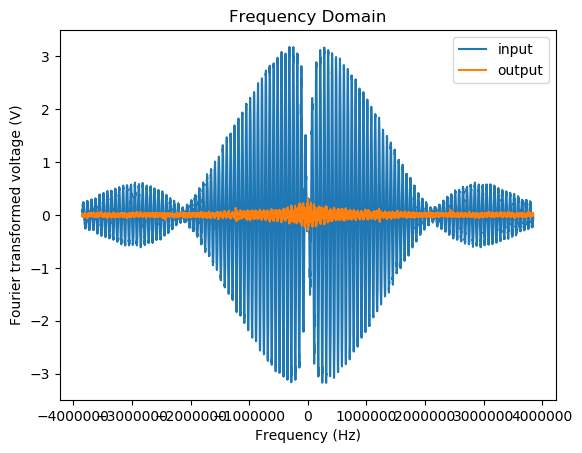

In [44]:
#plot the imaginary part of fourier transformed data 

plt.figure()
plt.plot(xdata,Input_imag, label = 'input')
plt.plot(xdata,Output_imag, label = 'output' )
plt.legend()
plt.ylabel('Fourier transformed voltage (V)')
plt.xlabel('Frequency (Hz)')
plt.title("Frequency Domain")

Imaginary and real part of the fourirer transformed data are same. 

### Experimental and Theoretical Comparison

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

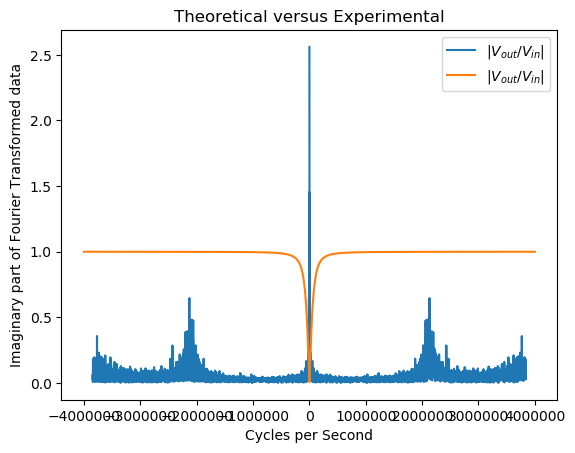

In [45]:
freqarray = np.linspace(-4*10**6, 4*10**6, 8192)
R = 200
C = 10*10**-9
magnitude = np.abs(np.fft.fft(np.fft.fftshift(Channel_2)))/np.abs(np.fft.fft(np.fft.fftshift(Channel_1)))


plt.plot(xdata,magnitude, label= '$|V_{out}/V_{in}|$')
plt.plot(freqarray, np.sqrt(R**2/(R**2+1/(2*np.pi*freqarray)**2/C**2)), label= '$|V_{out}/V_{in}|$')
plt.legend()
plt.title('Theoretical versus Experimental')
plt.xlabel('Cycles per Second')
plt.ylabel('Imaginary part of Fourier Transformed data')

Text(0, 0.5, 'Voltage (V)')

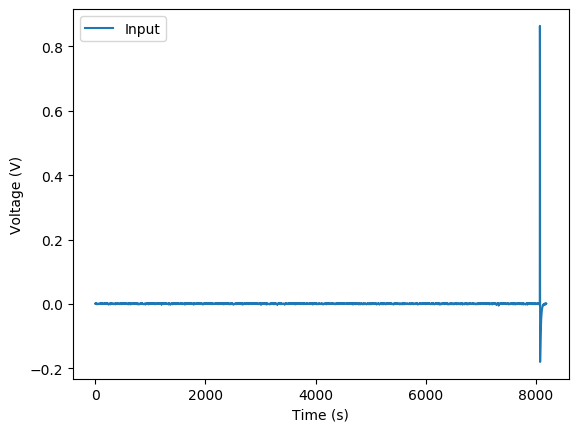

In [46]:
plt.plot(np.fft.fftshift(Channel_1), label='Input')
plt.legend()
fig.suptitle('Pulse Across a High-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')